##### Chapter 1: Data Preprocessing

In [73]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
pd.options.display.max_colwidth = 1000

In [74]:
df = pd.read_excel('../data_processed/education.xlsx')
# df['created_at'] = pd.to_datetime(df['created_at']).dt.date.astype(str)
df['text'] = df['text'].astype(str)

In [75]:
df = df.dropna(subset=['text'])
df.shape

(132707, 5)

##### Label the tweets

In [76]:
# def check_keywords(text):
#     for word in keywords:
#         if word in text.lower():
#             return 1
#     return 0
#df['label'] = df['text'].apply(check_keywords)
#df['label'] = [1 if any(keyword in text.lower() for keyword in keywords) else 0 for text in df['text']]
# keywords = ['education', 'ban', 'school']

def label_tweets(text):
    keywords = ['women', 'education', 'ban', 'school', 'girls']

    for keyword in keywords:
        if keyword in text.lower():
            return 1
    return 0
df = df.copy()
df['label'] = df['text'].apply(label_tweets)

In [77]:
# Group the tweets by label and count the number of tweets in each group
# label_counts = df.groupby('label').size()
# # Print the label counts
# print(label_counts)


In [78]:
# Calculate the percentage of tweets that are labeled as 1 and 0
label_counts = df['label'].value_counts(normalize=True) * 100
# Display the percentages
print(f"Label 1: {label_counts[1]:.2f}%")
print(f"Label 0: {label_counts[0]:.2f}%")


Label 1: 63.07%
Label 0: 36.93%


##### Group

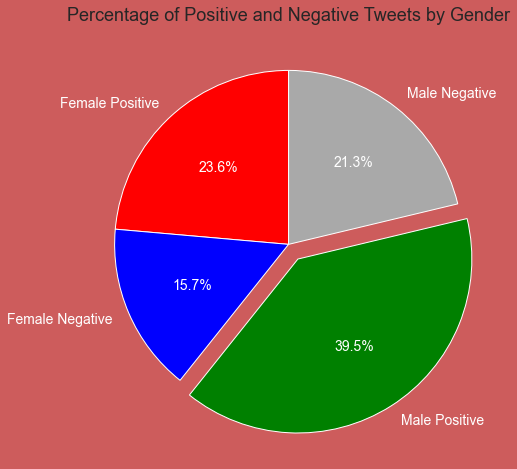

In [79]:
# Group the tweets by gender and label, and count the number of tweets in each group
gender_label_counts = df.groupby(['gender', 'label']).size().unstack(level=1)
# Calculate the percentage of positive and negative tweets for each gender
gender_label_counts['Total'] = gender_label_counts.sum(axis=1)
gender_label_counts['Positive %'] = gender_label_counts[1] / gender_label_counts['Total'] * 100
gender_label_counts['Negative %'] = gender_label_counts[0] / gender_label_counts['Total'] * 100
# Create a pie chart of the percentage of positive and negative tweets by gender
labels = ['Female Positive', 'Female Negative', 'Male Positive', 'Male Negative']
sizes = [gender_label_counts.loc['female', 1], gender_label_counts.loc['female', 0], gender_label_counts.loc['male', 1], gender_label_counts.loc['male', 0]]
colors = ['red', 'blue', 'green', 'darkgray']
explode = (0, 0, 0.1, 0)  # explode the male positive slice
fig, ax = plt.subplots(figsize=(15, 8), facecolor='#CD5C5C')
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'w', 'fontsize': 14})
ax.set_title('Percentage of Positive and Negative Tweets by Gender', fontsize=18)
# Show the plot
plt.show()


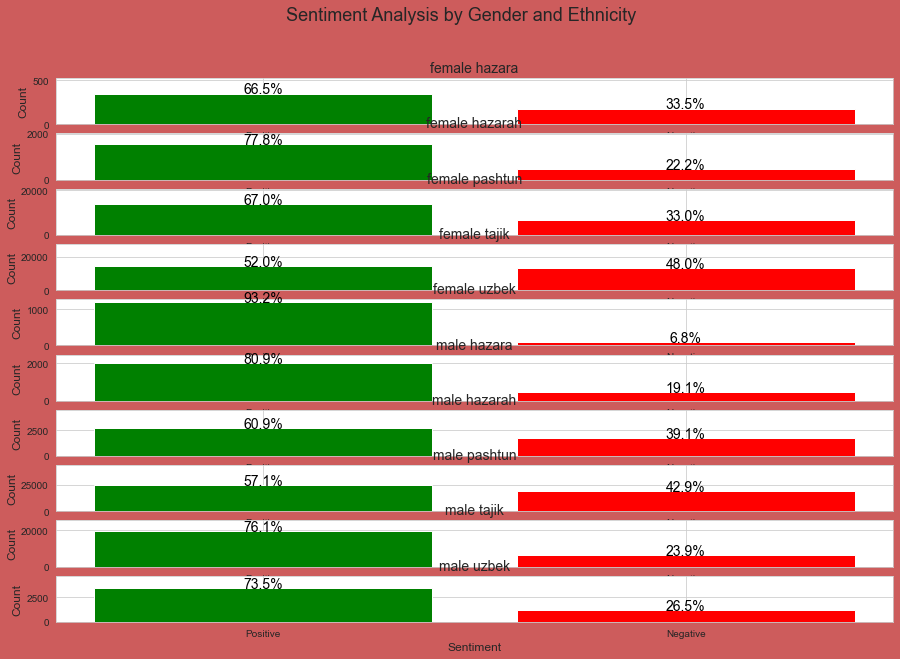

In [80]:
# Group the tweets by gender, ethnic and label, and count the number of tweets in each group
gender_ethnic_label_counts = df.groupby(['gender', 'ethnic', 'label']).size().unstack(level=2)
# Calculate the percentage of positive and negative tweets for each gender and ethnic group
gender_ethnic_label_counts['Total'] = gender_ethnic_label_counts.sum(axis=1)
gender_ethnic_label_counts['Positive %'] = gender_ethnic_label_counts[1] / gender_ethnic_label_counts['Total'] * 100
gender_ethnic_label_counts['Negative %'] = gender_ethnic_label_counts[0] / gender_ethnic_label_counts['Total'] * 100
# Create a bar chart for each gender and ethnicity combination, with the percentage of positive and negative tweets
fig, axs = plt.subplots(nrows=len(gender_ethnic_label_counts.index), ncols=1, figsize=(15, 10), facecolor='#CD5C5C')
axs = axs.flatten()
colors = ['red', 'blue', 'green', 'darkgray']
for i, group in enumerate(gender_ethnic_label_counts.index):
    gender, ethnic = group[:2]
    ax = axs[i]
    ax.bar(['Positive', 'Negative'], gender_ethnic_label_counts.loc[group, [1, 0]], color=['green', 'red'])
    ax.set_title(f'{gender} {ethnic}', fontsize=14)
    ax.set_xlabel('Sentiment', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_ylim([0, gender_ethnic_label_counts.loc[group, 'Total']])
    ax.text(0, gender_ethnic_label_counts.loc[group, 1]+5, f"{gender_ethnic_label_counts.loc[group, 'Positive %']:.1f}%", ha='center', color='black', fontsize=14)
    ax.text(1, gender_ethnic_label_counts.loc[group, 0]+5, f"{gender_ethnic_label_counts.loc[group, 'Negative %']:.1f}%", ha='center', color='black', fontsize=14)
# Add a suptitle to the figure
fig.suptitle('Sentiment Analysis by Gender and Ethnicity', fontsize=18)

# Show the plot
plt.show()


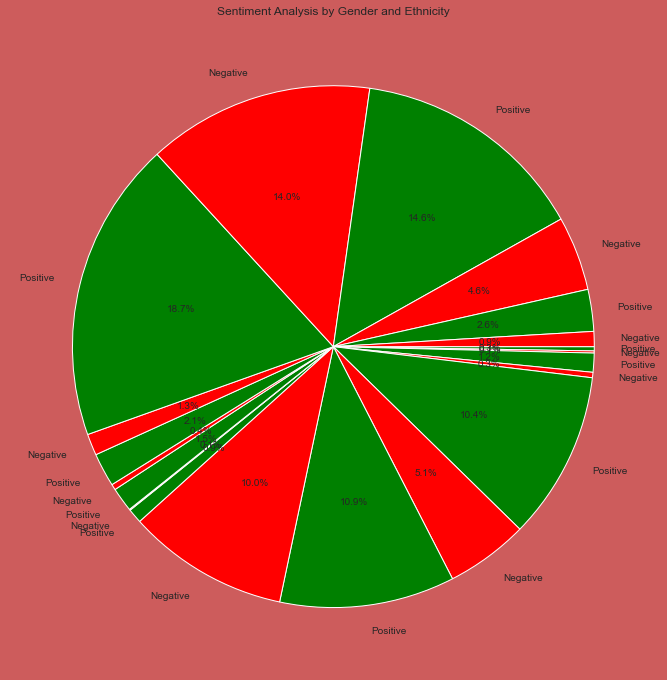

In [81]:
# # Group the tweets by gender, ethnic and label, and count the number of tweets in each group
# gender_ethnic_label_counts = df.groupby(['gender', 'ethnic', 'label']).size().unstack(level=2)

# # Calculate the percentage of positive and negative tweets for each gender and ethnic group
# gender_ethnic_label_counts['Total'] = gender_ethnic_label_counts.sum(axis=1)
# gender_ethnic_label_counts['Positive %'] = gender_ethnic_label_counts[1] / gender_ethnic_label_counts['Total'] * 100
# gender_ethnic_label_counts['Negative %'] = gender_ethnic_label_counts[0] / gender_ethnic_label_counts['Total'] * 100

# # Create a pie chart for each gender and ethnicity combination, with the percentage of positive and negative tweets
# fig, axs = plt.subplots(nrows=len(gender_ethnic_label_counts.index), ncols=1, figsize=(15, 10))
# axs = axs.flatten()
# colors = ['green', 'red']

# for i, group in enumerate(gender_ethnic_label_counts.index):
#     gender, ethnic = group[:2]
#     ax = axs[i]
#     ax.pie(gender_ethnic_label_counts.loc[group, [1, 0]], colors=colors, autopct='%1.1f%%', startangle=90)
#     ax.set_title(f'{gender} {ethnic}', fontsize=14)

# # Add a suptitle to the figure
# fig.suptitle('Sentiment Analysis by Gender and Ethnicity', fontsize=18)

# # Show the plot
# plt.show()

df['text'] = df['text'].astype(str)
# Group the tweets by gender, ethnic and label, and count the number of tweets in each group
gender_ethnic_label_counts = df.groupby(['gender', 'ethnic', 'label']).size().unstack(level=2)
# Calculate the percentage of positive and negative tweets for each gender and ethnic group
gender_ethnic_label_counts['Total'] = gender_ethnic_label_counts.sum(axis=1)
gender_ethnic_label_counts['Positive %'] = gender_ethnic_label_counts[1] / gender_ethnic_label_counts['Total'] * 100
gender_ethnic_label_counts['Negative %'] = gender_ethnic_label_counts[0] / gender_ethnic_label_counts['Total'] * 100

# Create a single pie chart for all gender and ethnicity combinations, with the percentage of positive and negative tweets
fig, ax = plt.subplots(figsize=(15, 12), facecolor='#CD5C5C')
colors = ['green', 'red']
labels = ['Positive', 'Negative']
sizes = []
for group in gender_ethnic_label_counts.index:
    sizes.extend(gender_ethnic_label_counts.loc[group, [1, 0]].fillna(0))
ax.pie(sizes, labels=labels*len(gender_ethnic_label_counts.index), colors=colors*len(gender_ethnic_label_counts.index), autopct='%1.1f%%',counterclock=False)
ax.set_title('Sentiment Analysis by Gender and Ethnicity', fontsize=12)
# Show the plot
plt.show()


##### Sentiment analysis

##### Sentiment Analysis

In [82]:

def get_sentiment(label):
    if label == 1:
        return 'positive'
    else:
        return 'negative'


df['sentiment'] = df['label'].apply(get_sentiment)


# def get_sentiment(text, label):
#     """
#     Takes in the text of a tweet and its label, and returns the sentiment of the tweet.
#     If the label is 1, the sentiment is positive; otherwise, the sentiment is negative.
#     """
#     if label == 1:
#         sentiment = TextBlob(text).sentiment.polarity
#         if sentiment > 0:
#             return "positive"
#         elif sentiment == 0:
#             return "neutral"
#         else:
#             return "negative"
#     else:
#         sentiment = TextBlob(text).sentiment.polarity
#         if sentiment > 0:
#             return "negative"
#         elif sentiment == 0:
#             return "neutral"
#         else:
#             return "positive"
# df['sentiment'] = df.apply(lambda x: get_sentiment(x['text'], x['label']), axis=1)


In [83]:
df[['label','sentiment']].sample(5)

,label,sentiment
13353,1,positive
21960,1,positive
131060,1,positive
16322,1,positive
36975,0,negative


##### Common positive words

In [84]:
positive_tweets = df[df['label'] == 1]
# textblob 
sentiments = positive_tweets['text'].apply(lambda x: TextBlob(x).sentiment)
# extract the polarity scores 
polarity_scores = sentiments.apply(lambda x: x.polarity)
#calculate the frequency of each polarity score
polarity_counts =  polarity_scores.value_counts()
print(polarity_counts.head())


 0.00    32481
 0.25     3098
 0.50     2138
-0.10     1363
 0.10     1357
Name: text, dtype: int64


0.00: This score means that the sentiment of the tweet is neutral, neither positive nor negative. The majority of positive tweets in the dataset (30.93%) have a neutral sentiment.

0.25: This score means that the sentiment of the tweet is slightly positive. Around 5.02% of positive tweets have this polarity score.

0.50: This score means that the sentiment of the tweet is moderately positive. Around 2.31% of positive tweets have this polarity score.

0.12: This score means that the sentiment of the tweet is slightly positive. Around 1.89% of positive tweets have this polarity score.

-0.10: This score means that the sentiment of the tweet is slightly negative. Around 1.73% of positive tweets have this polarity score.

In [85]:
positive_tweets = df[df['label'] == 1]
# calculate sentiment polarity scores using TextBlob
sentiments = positive_tweets['text'].apply(lambda x: TextBlob(x).sentiment)
# extract the polarity scores 
polarity_scores = sentiments.apply(lambda x: x.polarity)
# count the frequency of each polarity score
polarity_counts = polarity_scores.value_counts()
# calculate the percentage of each polarity score
polarity_percentages = (polarity_counts / len(positive_tweets)) * 100
# print the top 5 most common polarity scores with their percentage
print("Top 5 Most Common Polarity Scores:")
for i, (score, count) in enumerate(polarity_counts.head(5).items()):
    percentage = polarity_percentages.loc[score]
    print(f"{i+1}. {score:.2f}: {count} ({percentage:.2f}%)")


Top 5 Most Common Polarity Scores:
1. 0.00: 32481 (38.81%)
2. 0.25: 3098 (3.70%)
3. 0.50: 2138 (2.55%)
4. -0.10: 1363 (1.63%)
5. 0.10: 1357 (1.62%)


Top 5 Most Common Polarity Scores:
1. 0.00: 32481 (38.81%)
2. 0.25: 3098 (3.70%)
3. 0.50: 2138 (2.55%)
4. -0.10: 1363 (1.63%)
5. 0.10: 1357 (1.62%)


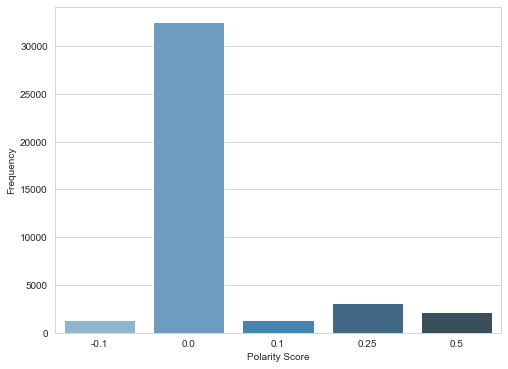

In [86]:

# calculate sentiment polarity scores using TextBlob
sentiments = df[df['label'] == 1]['text'].apply(lambda x: TextBlob(x).sentiment)

# extract the polarity scores 
polarity_scores = sentiments.apply(lambda x: x.polarity)

# count the frequency of each polarity score
polarity_counts = polarity_scores.value_counts().head()

# calculate the percentage of each polarity score
polarity_percentages = (polarity_counts / len(df[df['label'] == 1])) * 100

# print the top 5 most common polarity scores with their percentage
print("Top 5 Most Common Polarity Scores:")
for i, (score, count) in enumerate(polarity_counts.items()):
    percentage = polarity_percentages.loc[score]
    print(f"{i+1}. {score:.2f}: {count} ({percentage:.2f}%)")

# create a bar chart of the polarity scores
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(x=polarity_counts.index, y=polarity_counts.values, palette="Blues_d")
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Frequency")
plt.show()


##### Top 10 Positive words

In [87]:
stop_words = set(stopwords.words('english'))
# process positive tweets, tokenize and remove stopwords
positive_tweets = df[df['label'] == 1].copy()
positive_tweets['text'] = positive_tweets['text'].apply(lambda x: nltk.word_tokenize(x.lower()))
positive_tweets['text'] = positive_tweets['text'].apply(lambda x: [token for token in x if token.isalpha() and token not in stop_words])
# get top 10 most common words
top_words = (positive_tweets['text']
             .apply(pd.Series, dtype=object)
             .stack()
             .value_counts()
             .head(10)
             .rename_axis('word')
             .reset_index(name='count'))
print(top_words)


          word  count
0      taliban  36133
1  afghanistan  35940
2        women  27918
3       school  19820
4    education  16241
5           rt  10365
6       people   9550
7        girls   8443
8       afghan   7188
9        kabul   6948


Top 10 Negative words

In [88]:
# process negative tweets, tokenize and remove stopwords
negative_tweets = df[df['label'] == 0].copy()
negative_tweets['text'] = negative_tweets['text'].apply(lambda x: nltk.word_tokenize(x.lower()))
negative_tweets['text'] = negative_tweets['text'].apply(lambda x: [token for token in x if token.isalpha() and token not in stop_words])

# get top 10 most common words
top_words = (negative_tweets['text']
             .apply(pd.Series, dtype=object)
             .stack()
             .value_counts()
             .head(10)
             .rename_axis('word')
             .reset_index(name='count'))
print(top_words)


          word  count
0  afghanistan  15535
1       people   8009
2        kabul   3860
3        peace   3842
4          day   3412
5          one   3091
6           rt   2453
7         work   2297
8     security   2226
9          two   2028


##### The mean of positive tweets

In [89]:
positive_tweets = df[df['label'] == 1]
sentiments = positive_tweets['text'].apply(lambda x: TextBlob(x).sentiment)
polarity_scores = sentiments.apply(lambda x: x.polarity)
# calculate the mean polarity score
mean_polarity = polarity_scores.mean()
print((mean_polarity))


0.0662994198368508


In [90]:
df.shape

(132707, 7)

##### Transforming Tweets into Numerical

Fitting and transforming the entire text data df['text'] using TfidfVectorizer, and then storing the transformed data in X_tfidf.



In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
# Define the text data and target variable
X = df['text']
y = df['label']
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)
print(X_tfidf)

  (0, 62594)	0.16177734679339442
  (0, 13119)	0.20677780659876202
  (0, 36608)	0.21808635269716684
  (0, 9518)	0.33496592297552746
  (0, 3854)	0.21561839547726935
  (0, 63127)	0.2119512109951145
  (0, 1390)	0.33244562885641915
  (0, 55730)	0.3508711667455544
  (0, 15946)	0.29495768835123365
  (0, 30200)	0.4494183402937705
  (0, 9517)	0.26350345133493625
  (0, 16442)	0.2963966438577647
  (1, 48159)	0.2591744295277014
  (1, 61597)	0.26227530162689694
  (1, 2689)	0.25226080341643264
  (1, 46412)	0.2666463205289733
  (1, 13971)	0.21408546436832146
  (1, 48100)	0.17113409590395845
  (1, 23501)	0.27920879048212816
  (1, 10280)	0.20163795878878507
  (1, 8910)	0.32511314120335705
  (1, 49948)	0.32511314120335705
  (1, 11220)	0.2943393574551614
  (1, 59841)	0.12817734893717048
  (1, 45044)	0.2115261705487129
  :	:
  (132705, 16629)	0.18133940907529528
  (132705, 43055)	0.09091960191144285
  (132705, 24220)	0.20048722814931647
  (132705, 43971)	0.15802394084543872
  (132705, 52062)	0.19591087600

splitting the data into training and testing sets, and then fitting and transforming the training data using TfidfVectorizer to get X_train_tfidf, and transforming the testing data using the same vectorizer to get X_test_tfidf. The purpose of splitting the data is to evaluate the performance of the machine learning model on the unseen data (test set).

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)
# Create the TF-IDF feature vectors for the training and testing sets
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(X_test_tfidf)

  (0, 57132)	0.14123633383580858
  (0, 56770)	0.166751326660231
  (0, 56761)	0.1541838577665318
  (0, 52477)	0.17724322198738035
  (0, 47541)	0.16241022810666803
  (0, 43620)	0.14976658456767267
  (0, 41863)	0.21228643788609775
  (0, 41122)	0.18671425359515698
  (0, 39657)	0.17849727974703758
  (0, 35752)	0.21266294298660535
  (0, 34091)	0.24905790077179918
  (0, 31098)	0.12207133410537961
  (0, 21570)	0.24606460634738392
  (0, 19511)	0.24751720909702504
  (0, 19099)	0.19960526128835818
  (0, 18898)	0.1775271761085855
  (0, 17899)	0.08340380029229191
  (0, 17198)	0.21504721806776275
  (0, 16128)	0.17422901959843212
  (0, 12716)	0.24905790077179918
  (0, 11482)	0.2367193850433616
  (0, 8277)	0.15750692464751306
  (0, 7671)	0.15847770213283888
  (0, 4426)	0.11475223730951127
  (0, 2380)	0.2563689463623234
  :	:
  (26540, 47987)	0.38880280565770975
  (26540, 44556)	0.22257212663252565
  (26540, 43609)	0.34312748243259156
  (26540, 37837)	0.3622619327673354
  (26540, 35483)	0.2908921608273

##### predict the labels for new, unseen data

In [94]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
# Evaluate the model on the test data
accuracy = model.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9538090573430789


##### Evaluate the performance the model
predictions on a test set after training a model using the training set. It uses the TF-IDF feature vectors to make predictions and calculates the accuracy, precision, recall, and F1 score.

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9538090573430789
Precision: 0.9988448209472468
Recall: 0.927975196756499
F1 score: 0.962106694689992


##### classification
 a logistic regression model using all the data and making predictions on the same data. It also uses the TF-IDF feature vectors to make predictions and calculates the accuracy, precision, recall, and F1 score.

In [96]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# # Create the TF-IDF feature vectors for the data
# vectorizer = TfidfVectorizer()
# X_tfidf = vectorizer.fit_transform(df['text'])

# # Train a logistic regression model
# clf = LogisticRegression()
# clf.fit(X_tfidf, df['label'])

# # Make predictions on the data
# y_pred = clf.predict(X_tfidf)

# # Calculate the metrics
# accuracy = accuracy_score(df['label'], y_pred)
# precision = precision_score(df['label'], y_pred)
# recall = recall_score(df['label'], y_pred)
# f1 = f1_score(df['label'], y_pred)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 score:", f1)


##### Naive Bayes classifier

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Create the TF-IDF feature vectors for the training and testing data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.949890739205787
Precision: 0.9990982867448152
Recall: 0.9217970049916805
F1 score: 0.9588922544353093


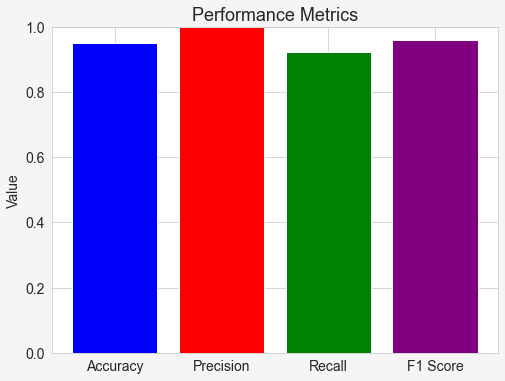

In [98]:
# Create a bar chart of the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'red', 'green', 'purple']
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#F5F5F5')
ax.bar(labels, values, color=colors)
ax.set_title('Performance Metrics', fontsize=18)
ax.set_ylim(0, 1)
ax.set_ylabel('Value', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

##### Feature engineering

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
# Define the feature engineering function
def add_features(df):
    df['text_length'] = df['text'].apply(len)
    df['num_words'] = df['text'].apply(lambda x: len(x.split()))
    return df
# Apply feature engineering to the dataset
df = add_features(df)
# Split the dataset into training and testing sets
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

# Create a pipeline for the logistic regression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('feature_selection', SelectKBest(chi2, k=10000)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(train_df['text'], train_df['label'])

# Make predictions on the testing set
y_pred = pipeline.predict(test_df['text'])

# Calculate the metrics
accuracy = accuracy_score(test_df['label'], y_pred)
precision = precision_score(test_df['label'], y_pred, zero_division=0.0)
recall = recall_score(test_df['label'], y_pred)
f1 = f1_score(test_df['label'], y_pred)
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9214075804385502
Precision: 0.9969562163427769
Recall: 0.8618851629444707
F1 score: 0.924513280741116


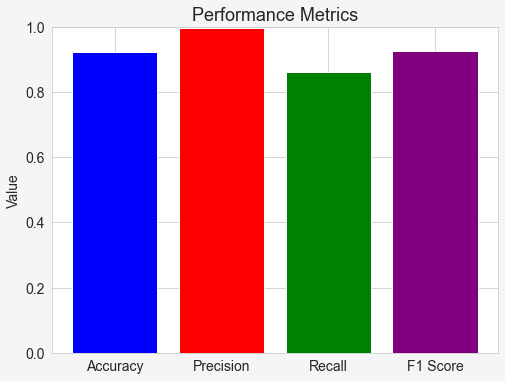

In [100]:
# Create a bar chart of the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'red', 'green', 'purple']
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#F5F5F5')
ax.bar(labels, values, color=colors)
ax.set_title('Performance Metrics', fontsize=18)
ax.set_ylim(0, 1)
ax.set_ylabel('Value', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

##### Bag-of-words

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the corpus of all the tweets
corpus = df['text'].values
# Create a CountVectorizer object to build the vocabulary
vectorizer = CountVectorizer(stop_words='english')
# Fit the vectorizer to the corpus and transform the tweets into feature vectors
X = vectorizer.fit_transform(corpus)
# Print the vocabulary and the resulting feature vectors for the first five tweets
print('Vocabulary:', vectorizer.get_feature_names_out())
print('Feature vectors:')
for i in range(5):
    print(X[i])


Vocabulary: ['00' '000' '00000but' ... 'zyoumbyoulev' 'zyourmat' 'zyourmati']
Feature vectors:
  (0, 16442)	1
  (0, 9517)	1
  (0, 30200)	1
  (0, 15946)	2
  (0, 55730)	1
  (0, 1390)	1
  (0, 63127)	1
  (0, 3854)	1
  (0, 9518)	1
  (0, 36608)	1
  (0, 13119)	1
  (0, 62594)	1
  (0, 30981)	1
  (0, 23155)	1
  (0, 45044)	1
  (0, 59841)	1
  (0, 11220)	1
  (0, 49948)	1
  (0, 8910)	1
  (0, 10280)	1
  (0, 23501)	1
  (0, 48100)	1
  (0, 13971)	1
  (0, 46412)	1
  (0, 2689)	1
  (0, 61597)	1
  (0, 48159)	1
  (0, 45044)	1
  (0, 46412)	1
  (0, 54922)	1
  (0, 44762)	1
  (0, 35332)	1
  (0, 6427)	1
  (0, 6833)	1
  (0, 48501)	1
  (0, 52062)	1
  (0, 48818)	1
  (0, 25358)	1
  (0, 19409)	1
  (0, 36517)	1
  (0, 19340)	1
  (0, 19401)	1
  (0, 21437)	1
  (0, 34887)	1
  (0, 30668)	1
  (0, 2168)	1
  (0, 50068)	1
  (0, 43971)	1
  (0, 40675)	1
  (0, 47015)	1
  (0, 21105)	1
  (0, 33409)	1
  (0, 38101)	1
  (0, 52626)	1
  (0, 41644)	1
  (0, 19145)	1
  (0, 27695)	1
  (0, 37433)	1
  (0, 49690)	1
  (0, 62)	1
  (0, 36659)	1
  

##### Change all number to string

In [109]:
# def number_to_text(n):
#     # Handle non-numeric values
#     if pd.isna(n):
#         return ''
#     elif not isinstance(n, (int, float)):
#         return str(n)
#     # Handle numeric values
#     ones = ['','one','two','three','four','five','six','seven','eight','nine']
#     tens = ['','ten','twenty','thirty','forty','fifty','sixty','seventy','eighty','ninety']
#     teens = ['','eleven','twelve','thirteen','fourteen','fifteen','sixteen','seventeen','eighteen','nineteen']
#     if n == 0:
#         return 'zero'
#     elif n < 0:
#         return 'minus ' + number_to_text(abs(n))
#     elif n < 10:
#         return ones[n]
#     elif n < 20:
#         return teens[n-10]
#     elif n < 100:
#         return tens[n//10] + ('' if n%10==0 else ' ' + ones[n%10])
#     elif n < 1000:
#         return ones[n//100] + ' hundred' + ('' if n%100==0 else ' and ' + number_to_text(n%100))
#     elif n < 1000000:
#         return number_to_text(n//1000) + ' thousand' + ('' if n%1000==0 else ', ' + number_to_text(n%1000))
#     elif n < 1000000000:
#         return number_to_text(n//1000000) + ' million' + ('' if n%1000000==0 else ', ' + number_to_text(n%1000000))
#     else:
#         return 'number out of range'
# # Replace numbers in the 'text' column with their corresponding English text representation
# df['text'] = df['text'].str.replace(r'\b(\d+)\b', lambda match: number_to_text(int(match.group(1))), regex=True)


##### Training and testing

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string, re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Clean text df
df['text'] = df['text'].astype(str)
def clean_text(text):
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweets
    text = re.sub(r'RT : ', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    # Remove punctuations and convert to lower case
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text.lower())
    return text
df['text'] = df['text'].apply(clean_text)
# Feature engineering
keywords = ['women', 'education','school', 'university', 'girl',
            'ban',
            'taliban','educated', 'educational']
cv = CountVectorizer(vocabulary=keywords)
features = cv.fit_transform(df['text']).toarray()
# Split df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df['label'], test_size=0.2, random_state=42)
# Train the classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.6471253108281214
Precision: 0.6987265167242391
Recall: 0.6471253108281214
F1 score: 0.5285814671080127


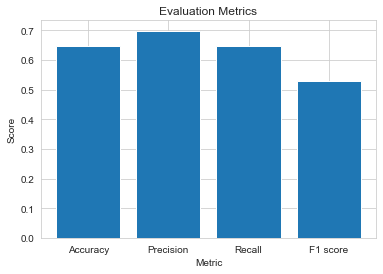

In [104]:
# Create a dictionary with the evaluation metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}
# Create a bar plot
plt.bar(metrics.keys(), metrics.values())
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()


In [105]:
df[['text','name', 'label', 'sentiment']].sample(5)

,text,name,label,sentiment
129002,afghanistan narang student peace,Atif Mashal عاطف مشعل,0,negative
44539,alfath last night tactical explosion was carried out at the center of joghazi headquaers in shendand district of dehrat province killing people,Qari Yousaf Ahmadi,0,negative
100525,sham david richards deaf listen people help people taliban,Nilofar Langar,1,positive
99145,taliban test faith people spread islam region,Bilal Sarwary,1,positive
102565,alfath yesterday seven sold r shot laser cannon lashkar gah capital helmand seven sold r lyouwa bolan area two sold r adam khan area aagarshak district,Qari usaf Ahmadi,0,negative


In [106]:
# words_to_drop = []
# for word in words_to_drop:
#     df = df[~df['text'].str.contains(word, case=False)]
# df.dropna(subset=['text'], inplace=True) #remove nan value
# df.drop_duplicates(subset=['text'], inplace=True) #remove nan duplicate value

In [107]:
df.shape

(132707, 9)

In [108]:
# df.to_excel('../data_processed/education.xlsx',index=False)